<a href="https://colab.research.google.com/github/aminurar57/Huffman-coding-file-compress-decompress/blob/main/Cobblestone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random

def generate_data_stream(length=1000):
    # Generate regular patterns
    regular_pattern = np.sin(np.linspace(0, 4*np.pi, length))  # Sinusoidal pattern

    # Generate seasonal elements
    seasonal_pattern = np.sin(np.linspace(0, 2*np.pi, length//50))  # Seasonal pattern with period of 50
    seasonal_pattern = np.repeat(seasonal_pattern, 50)  # Repeat pattern to match the desired length

    # Generate random noise
    noise = np.random.normal(0, 0.5, length)  # Gaussian noise with mean 0 and standard deviation 0.5

    # Combine all elements
    data_stream = regular_pattern + seasonal_pattern + noise

    return data_stream

# Usage
data_stream = generate_data_stream()



In [2]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

class KNNAnomalyDetector:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.model = NearestNeighbors(n_neighbors=n_neighbors)

    def fit(self, data):
        self.model.fit(data)

    def predict(self, data):
        distances, _ = self.model.kneighbors(data)
        mean_distance = np.mean(distances, axis=1)
        return mean_distance > np.percentile(mean_distance, 95)  # Anomalies are the top 5% of distances

# Usage
detector = KNNAnomalyDetector()

# Fit the model on the first part of the data stream
detector.fit(data_stream[:500].reshape(-1, 1))

# Predict anomalies on the rest of the data stream
anomalies = detector.predict(data_stream[500:1000].reshape(-1, 1))

# Update the model with new data periodically
for i in range(1000, len(data_stream), 500):
    detector.fit(data_stream[i:i+500].reshape(-1, 1))
    new_anomalies = detector.predict(data_stream[i+500:i+1000].reshape(-1, 1))
    anomalies = np.concatenate((anomalies, new_anomalies))


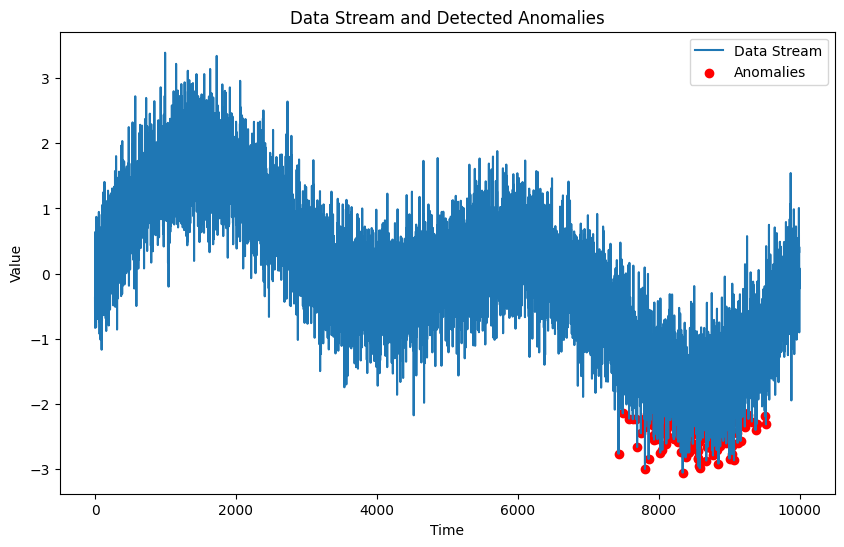

In [3]:
import matplotlib.pyplot as plt

# Generate the data stream and detect anomalies
data_stream = generate_data_stream(10000)
detector = KNNAnomalyDetector()
detector.fit(data_stream[:5000].reshape(-1, 1))
anomalies = detector.predict(data_stream[5000:].reshape(-1, 1))

# Plot the data stream
plt.figure(figsize=(10, 6))
plt.plot(data_stream, label='Data Stream')

# Plot the detected anomalies
anomaly_indices = np.where(anomalies)[0] + 5000  # Shift indices to match the second half of the data stream
plt.scatter(anomaly_indices, data_stream[anomaly_indices], color='red', label='Anomalies')

plt.title('Data Stream and Detected Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
